<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Nuclear/Attenuation_coefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attenuation coefficients



In [2]:
import numpy as np
import matplotlib.pyplot as plt

https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html

In [24]:
Aluminium = '''
#     Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  1.185E+03  1.183E+03
   1.50000E-03  4.022E+02  4.001E+02
   1.55960E-03  3.621E+02  3.600E+02
   1.55960E-03  3.957E+03  3.829E+03
   2.00000E-03  2.263E+03  2.204E+03
   3.00000E-03  7.880E+02  7.732E+02
   4.00000E-03  3.605E+02  3.545E+02
   5.00000E-03  1.934E+02  1.902E+02
   6.00000E-03  1.153E+02  1.133E+02
   8.00000E-03  5.033E+01  4.918E+01
   1.00000E-02  2.623E+01  2.543E+01
   1.50000E-02  7.955E+00  7.487E+00
   2.00000E-02  3.441E+00  3.094E+00
   3.00000E-02  1.128E+00  8.778E-01
   4.00000E-02  5.685E-01  3.601E-01
   5.00000E-02  3.681E-01  1.840E-01
   6.00000E-02  2.778E-01  1.099E-01
   8.00000E-02  2.018E-01  5.511E-02
   1.00000E-01  1.704E-01  3.794E-02
   1.50000E-01  1.378E-01  2.827E-02
   2.00000E-01  1.223E-01  2.745E-02
   3.00000E-01  1.042E-01  2.816E-02
   4.00000E-01  9.276E-02  2.862E-02
   5.00000E-01  8.445E-02  2.868E-02
   6.00000E-01  7.802E-02  2.851E-02
   8.00000E-01  6.841E-02  2.778E-02
   1.00000E+00  6.146E-02  2.686E-02
   1.25000E+00  5.496E-02  2.565E-02
   1.50000E+00  5.006E-02  2.451E-02
   2.00000E+00  4.324E-02  2.266E-02
   3.00000E+00  3.541E-02  2.024E-02
   4.00000E+00  3.106E-02  1.882E-02
   5.00000E+00  2.836E-02  1.795E-02
   6.00000E+00  2.655E-02  1.739E-02
   8.00000E+00  2.437E-02  1.678E-02
   1.00000E+01  2.318E-02  1.650E-02
   1.50000E+01  2.195E-02  1.631E-02
   2.00000E+01  2.168E-02  1.633E-02
'''

Nickel = '''
#Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  9.855E+03  9.797E+03
   1.00404E-03  9.753E+03  9.697E+03
   1.00810E-03  9.654E+03  9.598E+03
   1.00810E-03  1.099E+04  1.093E+04
   1.50000E-03  4.234E+03  4.214E+03
   2.00000E-03  2.049E+03  2.039E+03
   3.00000E-03  7.094E+02  7.042E+02
   4.00000E-03  3.282E+02  3.244E+02
   5.00000E-03  1.793E+02  1.761E+02
   6.00000E-03  1.090E+02  1.064E+02
   8.00000E-03  4.952E+01  4.758E+01
   8.33280E-03  4.428E+01  4.242E+01
   8.33280E-03  3.294E+02  2.240E+02
   1.00000E-02  2.090E+02  1.524E+02
   1.50000E-02  7.081E+01  5.734E+01
   2.00000E-02  3.220E+01  2.722E+01
   3.00000E-02  1.034E+01  8.982E+00
   4.00000E-02  4.600E+00  3.967E+00
   5.00000E-02  2.474E+00  2.078E+00
   6.00000E-02  1.512E+00  1.219E+00
   8.00000E-02  7.306E-01  5.259E-01
   1.00000E-01  4.440E-01  2.781E-01
   1.50000E-01  2.208E-01  9.812E-02
   2.00000E-01  1.582E-01  5.649E-02
   3.00000E-01  1.154E-01  3.659E-02
   4.00000E-01  9.765E-02  3.209E-02
   5.00000E-01  8.698E-02  3.036E-02
   6.00000E-01  7.944E-02  2.937E-02
   8.00000E-01  6.891E-02  2.795E-02
   1.00000E+00  6.160E-02  2.674E-02
   1.25000E+00  5.494E-02  2.536E-02
   1.50000E+00  5.015E-02  2.420E-02
   2.00000E+00  4.387E-02  2.257E-02
   3.00000E+00  3.745E-02  2.107E-02
   4.00000E+00  3.444E-02  2.066E-02
   5.00000E+00  3.289E-02  2.070E-02
   6.00000E+00  3.210E-02  2.094E-02
   8.00000E+00  3.164E-02  2.163E-02
   1.00000E+01  3.185E-02  2.234E-02
   1.50000E+01  3.320E-02  2.368E-02
   2.00000E+01  3.476E-02  2.446E-02

'''
data = Nickel

E, mu = np.genfromtxt(data.splitlines(), unpack=True, usecols=[0,1])


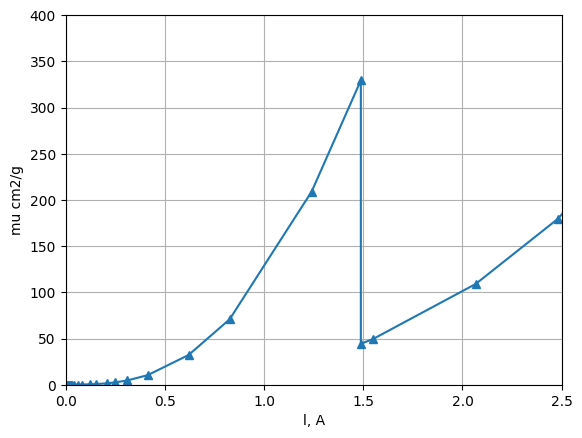

In [29]:
l = 12.398e-3 / E

plt.plot(l, mu, '-^')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('l, A')
plt.xlim(0, 2.5)
plt.ylim(0, 400)
plt.ylabel('mu cm2/g')
plt.grid()
plt.show()

*Elements of X-Ray Diffraction:*
B.D. Cullity S.R. Stock
Third Edition, p.12

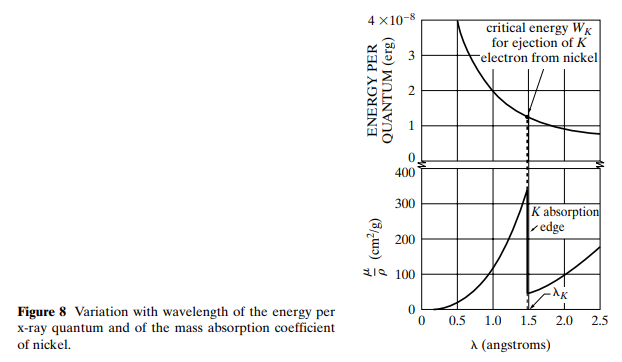

In [7]:
E

array([1.1850e+03, 4.0220e+02, 3.6210e+02, 1.5596e-03, 2.2630e+03,
       7.8800e+02, 3.6050e+02, 1.9340e+02, 1.1530e+02, 5.0330e+01,
       2.6230e+01, 7.9550e+00, 3.4410e+00, 1.1280e+00, 5.6850e-01,
       3.6810e-01, 2.7780e-01, 2.0180e-01, 1.7040e-01, 1.3780e-01,
       1.2230e-01, 1.0420e-01, 9.2760e-02, 8.4450e-02, 7.8020e-02,
       6.8410e-02, 6.1460e-02, 5.4960e-02, 5.0060e-02, 4.3240e-02,
       3.5410e-02, 3.1060e-02, 2.8360e-02, 2.6550e-02, 2.4370e-02,
       2.3180e-02, 2.1950e-02, 2.1680e-02])